### Malaria file Analysis

**Description:** Visualizing data on the Malaria Dataset<br>
**Dataset:** https://www.nature.com/articles/s41598-020-72575-6<br>
**Author:** Jaume Manero

In [1]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
#https://www.nature.com/articles/s41598-020-72575-6

In [2]:
df_train = pd.read_excel('./data/ibadan_malaria-prevalence_dataset_1996-2017.xlsx',sheet_name='vars-preP_train')
df_val = pd.read_excel('./data/ibadan_malaria-prevalence_dataset_1996-2017.xlsx',sheet_name='vars-preP_val')

In [3]:
df_train.columns

Index(['year', 'month', 'nchildren', 'm-age-neg', 'm-age-pos', 'iqr-age-neg',
       'iqr-age-pos', 'x-pd', 'sd-pd', 'mm-rf', 'mmP-rf', 'min-temp',
       'max-temp', 'x-temp', 'preP'],
      dtype='object')

In [4]:
df_train['logpreP'] = np.log10(df_train['preP'])
df2 = df_train[['year', 'month', 'preP', 'logpreP']].copy()
arr = df2.to_numpy()
print(np.amin(arr[:,3]), np.amax(arr[:,3]))
miN = np.amin(arr[:,3])
maX = np.amax(arr[:,3])

-1.6473829701146196 -0.15824591861933743


In [5]:

years = ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
         '2008', '2009', '2010', '2011', '2012', '2013', '2014']
mes = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

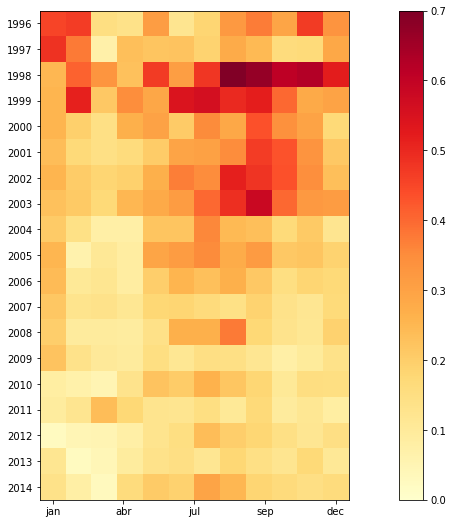

In [6]:
arr_1 = arr[:,2].reshape(19,12)
fig, ax = plt.subplots(figsize=(18,9))
im = ax.imshow(arr_1, cmap='YlOrRd', interpolation='nearest',vmin=0, vmax=0.7)

N=5
plt.xticks(np.linspace(0, 11, N), ['jan','abr','jul','sep','dec'])
plt.yticks(np.arange(0, 19, 1), years)

plt.colorbar(im)
plt.show()

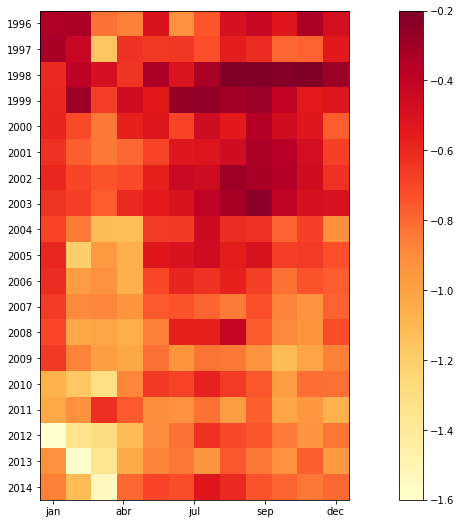

In [7]:
arr_2 = arr[:,3].reshape(19,12)
fig, ax = plt.subplots(figsize=(18,9))
im= ax.imshow(arr_2, cmap='YlOrRd', interpolation='nearest', vmin=-1.6, vmax=-0.2)

N=5
plt.xticks(np.linspace(0, 11, N), ['jan','abr','jul','sep','dec'])
plt.yticks(np.arange(0, 19, 1), years)

plt.colorbar(im)
plt.show()

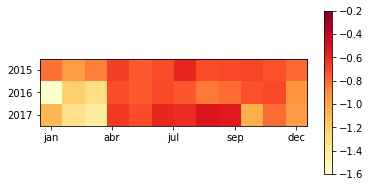

In [8]:
years_val = ['2015', '2016', '2017']
df_val['logpreP'] = np.log10(df_val['preP'])
df3 = df_val[['year', 'month', 'preP', 'logpreP']].copy()
arr3 = df3.to_numpy()
arr_3 = arr3[:,3].reshape(3,12)

# Validation figure
fig, ax = plt.subplots(figsize=(6,3))
im = ax.imshow(arr_3, cmap='YlOrRd', interpolation='nearest', vmin=-1.6, vmax=-0.2)

N=5
plt.xticks(np.linspace(0, 11, N), ['jan','abr','jul','sep','dec'])
plt.yticks(np.arange(0, 3, 1), years_val)
plt.colorbar(im)
plt.show()

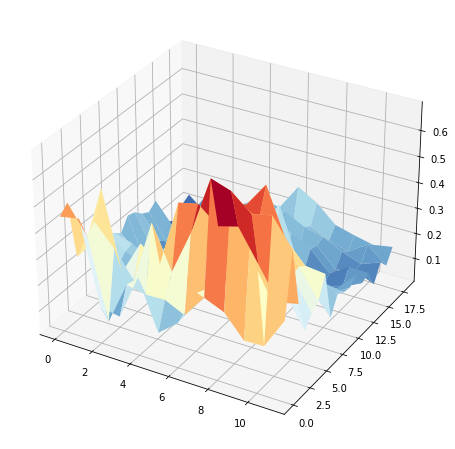

In [9]:
fig, ax = plt.subplots(figsize=(16,8), subplot_kw={'projection': '3d'})
plt.ioff()

# X = month
# Y = year
# Z = prevalence

x = np.arange(0, 12, 1)
y = np.arange(0, 19, 1)
Z = arr_1
X,Y = np.meshgrid(x,y)

ax.plot_surface(X, Y, Z, cmap=plt.cm.RdYlBu_r)
 


#print("X: {}. Y: {}. Z: {}".format(len(X),len(Y),len(Z)))

#surf = ax.plot_surface(X,Y,Z, rstride=1, zorder = 0, cstride=1, cmap=plt.cm.RdYlBu_r,  linewidth=0, antialiased=False)
#print("plotted surface")
#ax.set_zlim(0, 100)
#ax.view_init(30,-105)
#ax.set_zlim3d(-1.01, 200)

#fig.colorbar(surf, shrink=0.4, aspect=20)
#fig.show()

None


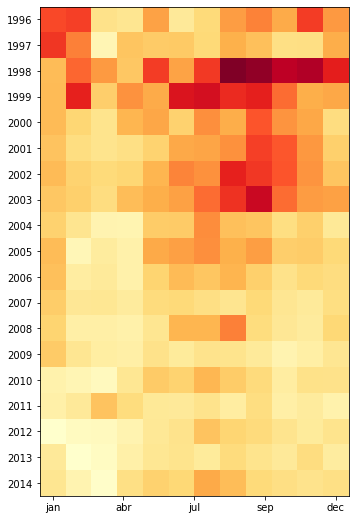

none


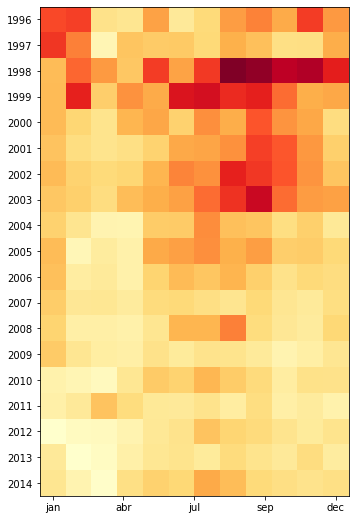

nearest


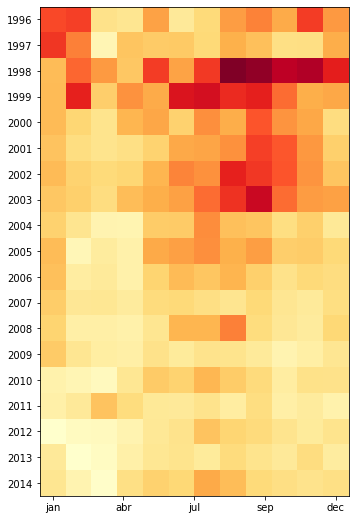

bilinear


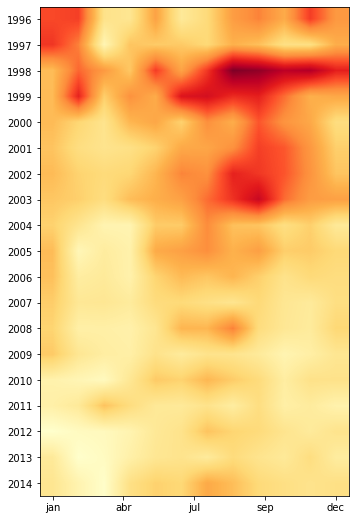

bicubic


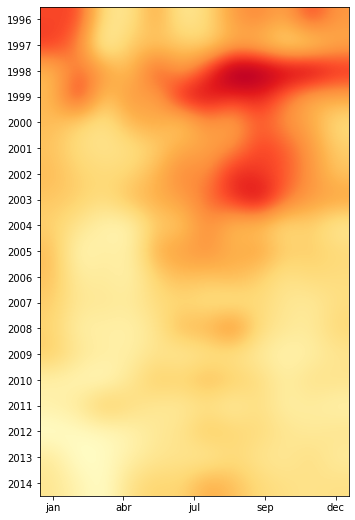

spline16


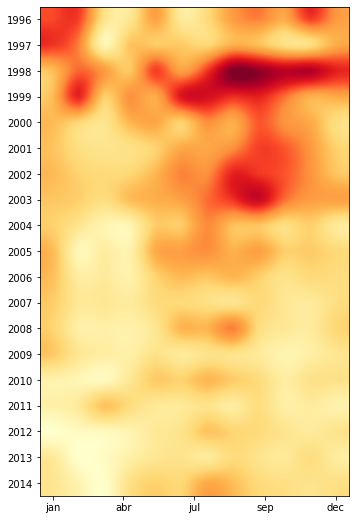

spline36


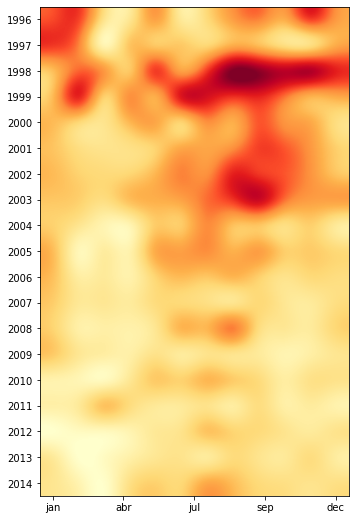

hanning


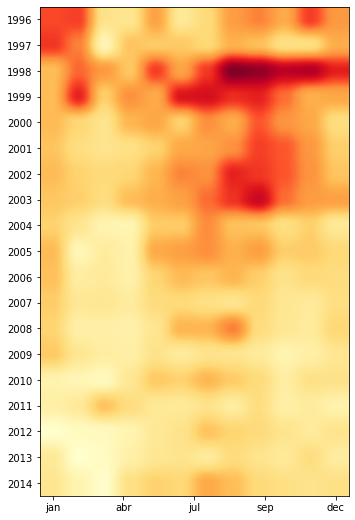

hamming


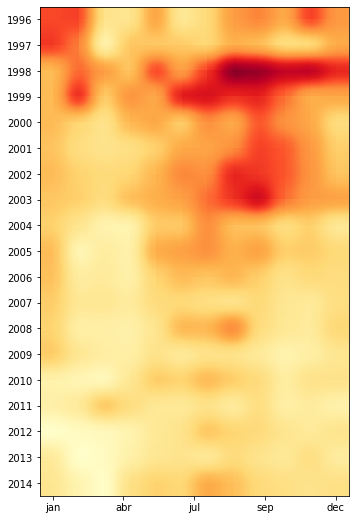

hermite


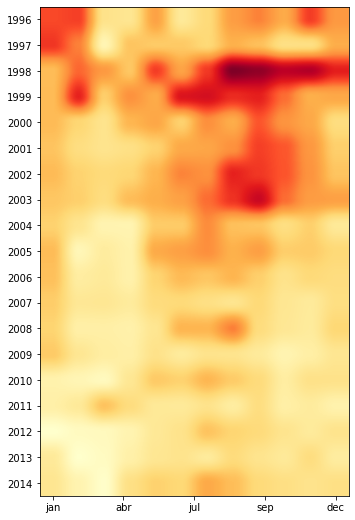

kaiser


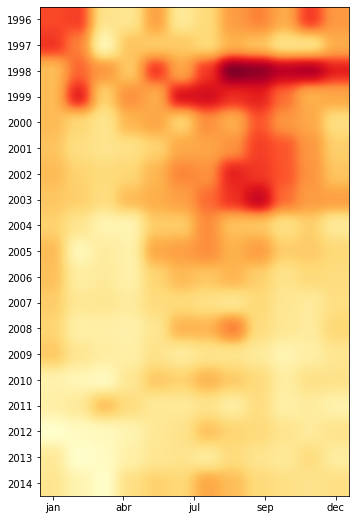

quadric


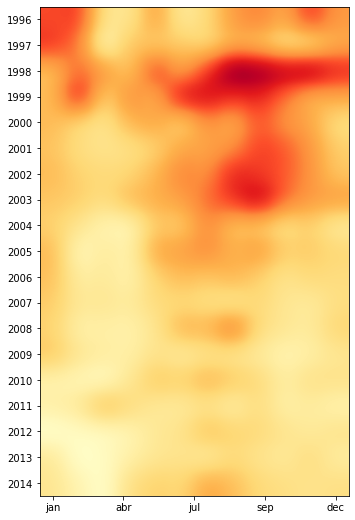

catrom


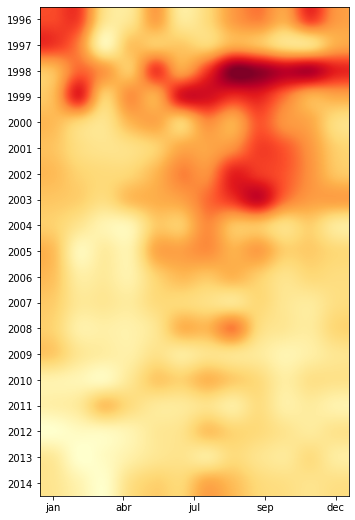

gaussian


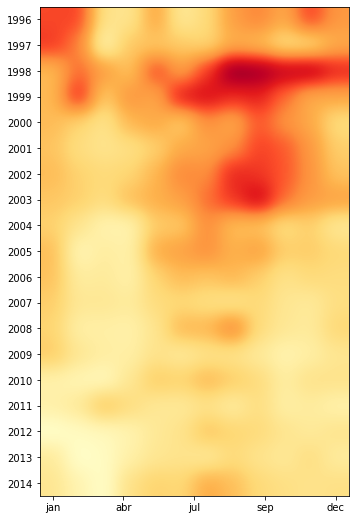

bessel


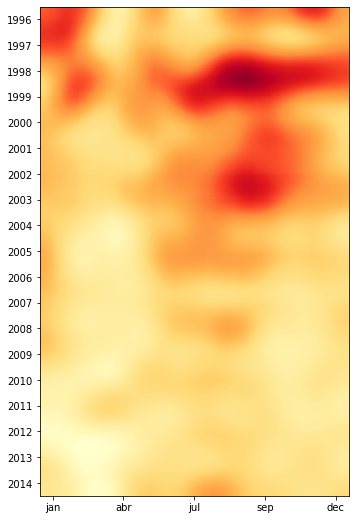

mitchell


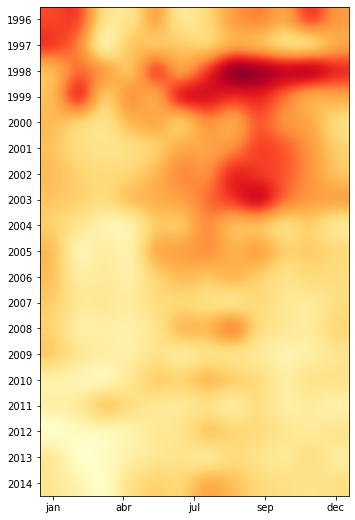

sinc


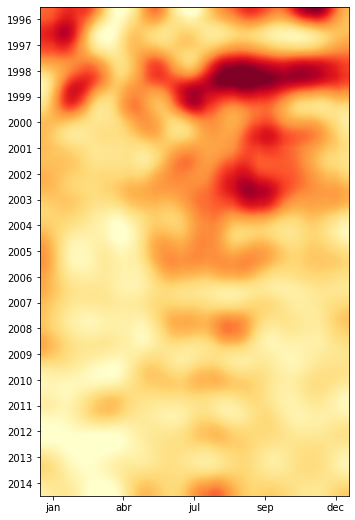

lanczos


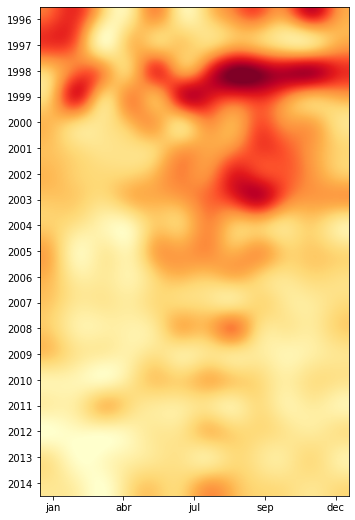

In [10]:


metods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
for a in metods:
   print (a)
   fig, ax = plt.subplots(figsize=(18,9))
   ax.imshow(arr_1, cmap='YlOrRd', interpolation=a)

   N=5
   plt.xticks(np.linspace(0, 11, N), ['jan','abr','jul','sep','dec'])
   plt.yticks(np.arange(0, 19, 1), years)

   plt.show()

